<a href="https://colab.research.google.com/github/ygh1025/demo-repo/blob/main/Tensorflow%20for%20class3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import csv
import random

print(tf.__version__)

2.8.0


In [1]:
!gdown --id 1NvV6VhmrfU8JDZNoEbwJxwx_6dhyN5bf

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NvV6VhmrfU8JDZNoEbwJxwx_6dhyN5bf
To: /content/happy-or-sad.zip
100% 2.67M/2.67M [00:00<00:00, 44.0MB/s]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [ ]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
line=data.split('\n')
tokenizer=Tokenizer()
tokenizer.fit_on_texts(line)
total_words=tokenizer.word_index
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [ ]:
tokenizer.texts_to_sequences([line[0]])

[[4, 2, 66, 8, 67, 68, 69, 70]]

In [ ]:
input_seq=[]
for sen in line:
  seq=tokenizer.texts_to_sequences([sen])[0]
  for i in range(1,len(seq)):
    input_seq.append(seq[:i+1])


In [ ]:
max_length=max([len(i) for i in input_seq])
max_length

11

In [ ]:
sen_pad=pad_sequences(input_seq,maxlen=max_length,padding='pre')
sen_pad

array([[  0,   0,   0, ...,   0,   4,   2],
       [  0,   0,   0, ...,   4,   2,  66],
       [  0,   0,   0, ...,   2,  66,   8],
       ...,
       [  0,   0,   0, ...,  60, 262,  13],
       [  0,   0,   0, ..., 262,  13,   9],
       [  0,   0,   0, ...,  13,   9,  10]], dtype=int32)

In [ ]:
data,label=sen_pad[:,:-1],sen_pad[:,-1]

In [ ]:
import numpy as np

In [ ]:
np.unique(label)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138,
       139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 19

In [ ]:
xs=data
ys=np.eye(max(label)+1)[label]

In [ ]:
model=Sequential()
model.add(Embedding(len(total_words)+1,100,input_length=max_length-1))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(263,activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           26300     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 263)               33927     
                                                                 
Total params: 144,707
Trainable params: 144,707
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist=model.fit(xs,label,epochs=500)

Epoch 1/500
15/15 [==============================] - 3s 6ms/step - loss: 5.5593 - accuracy: 0.0353
Epoch 2/500
15/15 [==============================] - 0s 6ms/step - loss: 5.4576 - accuracy: 0.0486
Epoch 3/500
15/15 [==============================] - 0s 6ms/step - loss: 5.1727 - accuracy: 0.0464
Epoch 4/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0543 - accuracy: 0.0552
Epoch 5/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0001 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9433 - accuracy: 0.0464
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 4.8617 - accuracy: 0.0552
Epoch 8/500
15/15 [==============================] - 0s 6ms/step - loss: 4.7807 - accuracy: 0.0574
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 4.6648 - accuracy: 0.0795
Epoch 10/500
15/15 [==============================] - 0s 6ms/step - loss: 4.5420 - accuracy: 0.0971
Epoch 11/

In [ ]:
seed_text = "Laurence went to dublin"
next_words =100
for _ in range(next_words):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  pad_list=pad_sequences([token_list],maxlen=max_length-1,padding='pre')
  next_data=np.argmax(model.predict(pad_list,verbose=0),axis=1)
  for word,ind in tokenizer.word_index.items():
    if next_data[0]==ind:
      text=word
  seed_text+=' '+text

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6Y17DW/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6Y17DW/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6Y17DW/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data,test_data=dataset['train'],dataset['test']

In [ ]:
import tensorflow as tf

In [ ]:
tokenizer=info.features['text'].encoder

In [ ]:
tokenizer.vocab_size

8185

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data =train_data.shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
model=Sequential([Embedding(tokenizer.vocab_size,64),
                  Conv1D(4,kernel_size=3,activation='relu'),
                  Bidirectional(GRU(64,return_sequences=True)),
                  Bidirectional(LSTM(64)),
                  Dense(64,activation='relu',kernel_regularizer=regularizers.l1()),
                  Dense(1,activation='sigmoid')                  
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
train_data.shape

AttributeError: ignored

In [ ]:
input=Input(shape=(None,))
X=Embedding(tokenizer.vocab_size,64)(input)
X=Conv1D(4,3,activation='relu')(X)
X=GlobalAveragePooling1D()(X)
X=Dense(64,activation='relu')(X)
out=Dense(1,activation='sigmoid')(X)
model2=Model(inputs=input,outputs=out)
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist2=model2.fit(train_data,validation_data=test_data,epochs=10)

Epoch 1/10
391/391 [==============================] - 11s 26ms/step - loss: 0.3655 - accuracy: 0.8427 - val_loss: 0.5212 - val_accuracy: 0.7646
Epoch 2/10
391/391 [==============================] - 11s 26ms/step - loss: 0.3526 - accuracy: 0.8497 - val_loss: 0.5294 - val_accuracy: 0.7625
Epoch 3/10
391/391 [==============================] - 11s 25ms/step - loss: 0.3400 - accuracy: 0.8560 - val_loss: 0.5369 - val_accuracy: 0.7640
Epoch 4/10
391/391 [==============================] - 11s 26ms/step - loss: 0.3367 - accuracy: 0.8570 - val_loss: 0.5435 - val_accuracy: 0.7612
Epoch 5/10
391/391 [==============================] - 11s 25ms/step - loss: 0.3246 - accuracy: 0.8650 - val_loss: 0.5586 - val_accuracy: 0.7629
Epoch 6/10
391/391 [==============================] - 11s 25ms/step - loss: 0.3441 - accuracy: 0.8673 - val_loss: 0.5663 - val_accuracy: 0.7611
Epoch 7/10
391/391 [==============================] - 11s 25ms/step - loss: 0.3092 - accuracy: 0.8721 - val_loss: 0.5692 - val_accuracy:

In [ ]:
hist=model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
391/391 [==============================] - 326s 811ms/step - loss: 1.8014 - accuracy: 0.5308 - val_loss: 0.7047 - val_accuracy: 0.5000
Epoch 2/10
391/391 [==============================] - 318s 813ms/step - loss: 0.7043 - accuracy: 0.5064 - val_loss: 0.7119 - val_accuracy: 0.5000
Epoch 3/10
125/391 [========>.....................] - ETA: 2:35 - loss: 0.7099 - accuracy: 0.4850

In [ ]:
import matplotlib.pyplot as plt
def model_plot(item):
  plt.plot(hist.history[item],label='train')
  plt.plot(hist.history['val_'+item],label='validation')
  plt.legend()
  plt.show()

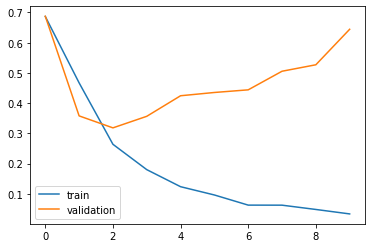

In [ ]:
model_plot('loss')

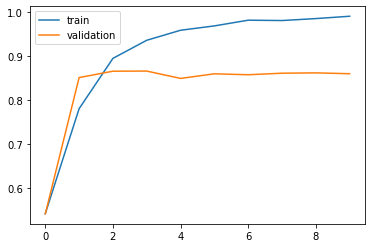

In [ ]:
model_plot('accuracy')

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-04-23 04:20:05--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.1.208, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.1.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.1’

sarcasm.json.1      100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2022-04-23 04:20:05 (199 MB/s) - ‘sarcasm.json.1’ saved [5643545/5643545]



In [ ]:
ls

sample_data/  sarcasm.json


In [ ]:
import json
import numpy as np

In [ ]:
with open('sarcasm.json','r') as file:
  datafile=json.load(file)

In [ ]:
vocab_size=2000
embedding_dim=16
max_length=120
training_size=20000

In [ ]:
sentences=[]
labels=[]
for item in datafile:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])



In [ ]:
training_sen=sentences[:training_size]
test_sen=sentences[training_size:]
training_labels=np.array(labels[:training_size])
testing_labels=np.array(labels[training_size:])

In [ ]:
len(sentences)

26709

In [ ]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(training_sen)
training_seq=tokenizer.texts_to_sequences(training_sen)
testing_seq=tokenizer.texts_to_sequences(test_sen)
training_pad=pad_sequences(training_seq,padding='post',maxlen=max_length,truncating='post')
testing_pad=pad_sequences(testing_seq,padding='post',maxlen=max_length,truncating='post')

In [ ]:
model3=Sequential([
                   Embedding(vocab_size,embedding_dim,input_length=max_length),
                   Conv1D(128,5,activation='relu'),
                   #Bidirectional(LSTM(64,return_sequences=True)),
                   GlobalMaxPooling1D(),
                   Dense(24,activation='relu'),
                   Dense(1,activation='sigmoid')                  
])
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist3=model3.fit(training_pad,training_labels,epochs=20,validation_data=(testing_pad,testing_labels))

Epoch 1/20
625/625 [==============================] - 4s 5ms/step - loss: 0.4567 - accuracy: 0.7749 - val_loss: 0.3828 - val_accuracy: 0.8283
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3181 - accuracy: 0.8619 - val_loss: 0.3856 - val_accuracy: 0.8258
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2628 - accuracy: 0.8899 - val_loss: 0.3960 - val_accuracy: 0.8299
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2107 - accuracy: 0.9160 - val_loss: 0.4629 - val_accuracy: 0.8168
Epoch 5/20
625/625 [==============================] - 2s 4ms/step - loss: 0.1651 - accuracy: 0.9364 - val_loss: 0.5131 - val_accuracy: 0.8122
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1216 - accuracy: 0.9567 - val_loss: 0.6032 - val_accuracy: 0.8180
Epoch 7/20
625/625 [==============================] - 3s 4ms/step - loss: 0.0837 - accuracy: 0.9726 - val_loss: 0.6828 - val_accuracy: 0.8097
Epoch 

In [ ]:
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 40.6MB/s]


In [ ]:

with open('/content/sonnets.txt','r') as file:

  data=file.read().lower().split('\n')


In [ ]:
data[:10]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [ ]:
data[:10]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,']

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data)
totalwords=tokenizer.word_index


In [ ]:
fseq=[]
for sen in data:
  seq=tokenizer.texts_to_sequences([sen])[0]
  for i in range(2,len(seq)+1):
    fseq.append(seq[:i])
xs=[]
label=[]
for seq in fseq:
  xs.append(seq[:-1])
  label.append(seq[-1])

    





In [ ]:
import numpy as np

In [ ]:
max(np.unique(label))

3210

In [ ]:
max_length=max([len(i) for i in fseq])-1
xs_pad=pad_sequences(xs,maxlen=max_length,padding='pre')
label=np.array(label)
print(xs_pad[:20])
print(label[:20])

[[  0   0   0   0   0   0   0   0   0  34]
 [  0   0   0   0   0   0   0   0  34 417]
 [  0   0   0   0   0   0   0  34 417 877]
 [  0   0   0   0   0   0  34 417 877 166]
 [  0   0   0   0   0  34 417 877 166 213]
 [  0   0   0   0   0   0   0   0   0   8]
 [  0   0   0   0   0   0   0   0   8 878]
 [  0   0   0   0   0   0   0   8 878 134]
 [  0   0   0   0   0   0   8 878 134 351]
 [  0   0   0   0   0   8 878 134 351 102]
 [  0   0   0   0   8 878 134 351 102 156]
 [  0   0   0   0   0   0   0   0   0  16]
 [  0   0   0   0   0   0   0   0  16  22]
 [  0   0   0   0   0   0   0  16  22   2]
 [  0   0   0   0   0   0  16  22   2 879]
 [  0   0   0   0   0  16  22   2 879  61]
 [  0   0   0   0  16  22   2 879  61  30]
 [  0   0   0  16  22   2 879  61  30  48]
 [  0   0   0   0   0   0   0   0   0  25]
 [  0   0   0   0   0   0   0   0  25 311]]
[417 877 166 213 517 878 134 351 102 156 199  22   2 879  61  30  48 634
 311 635]


In [ ]:
model=Sequential()
model.add(Embedding(3211,100,input_length=max_length))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
#model.add(MaxPooling1D(pool_size=3))
model.add(LSTM(100))
model.add(Dense(1612,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3211,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist=model.fit(xs_pad,label,epochs=140)

Epoch 1/140
484/484 [==============================] - 21s 23ms/step - loss: 6.9089 - accuracy: 0.0216
Epoch 2/140
484/484 [==============================] - 11s 22ms/step - loss: 6.5055 - accuracy: 0.0204
Epoch 3/140
484/484 [==============================] - 11s 22ms/step - loss: 6.4099 - accuracy: 0.0244
Epoch 4/140
484/484 [==============================] - 11s 22ms/step - loss: 6.2909 - accuracy: 0.0276
Epoch 5/140
484/484 [==============================] - 11s 22ms/step - loss: 6.1929 - accuracy: 0.0354
Epoch 6/140
484/484 [==============================] - 11s 22ms/step - loss: 6.1133 - accuracy: 0.0380
Epoch 7/140
484/484 [==============================] - 11s 22ms/step - loss: 6.0405 - accuracy: 0.0400
Epoch 8/140
484/484 [==============================] - 11s 22ms/step - loss: 5.9635 - accuracy: 0.0430
Epoch 9/140
484/484 [==============================] - 11s 22ms/step - loss: 5.8753 - accuracy: 0.0480
Epoch 10/140
484/484 [==============================] - 11s 22ms/step - l

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
for _ in range(next_words):
  seed_seq=tokenizer.texts_to_sequences([seed_text.lower()])
  pad_seed=pad_sequences(seed_seq,maxlen=max_length,padding='pre')
  new_text=np.argmax(model.predict(pad_seed,verbose=0),axis=1)
  for key,value in totalwords.items():
    if new_text[0]==value:
      new_word=key
  seed_text+=' '+new_word

In [ ]:
seed_text

"Help me Obi Wan Kenobi, you're my only hope doth mine eye hid out none live her dead doth rare ill might lend give men's pride bright bright spent forgot live now give men's old pride state thee torn twain die told young to know what let thee am am free am can see true great level of you hate of dwell can strive to prove thee new new faith are me thee behold to be thine love thy much delight or pride than one bail than convert convert seen them still live new new age with thee in all thy true eyes might loving grow dearer express'd forgot"

In [ ]:
new_text[0]

32

In [ ]:
!gdown --id 1wd8KaeCSHxt-nEpMeuHFSNWrDp8joUXJ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wd8KaeCSHxt-nEpMeuHFSNWrDp8joUXJ
To: /content/training_cleaned.csv
100% 239M/239M [00:02<00:00, 85.1MB/s]


In [ ]:
corpus=[]
numbers=0
with open('/content/training_cleaned.csv','r') as file:
  data=csv.reader(file,delimiter=',')
  
  for row in data:
    list_item=[]
    list_item.append(row[5])
    if row[0]=='0':
      list_item.append(0)
    else:
      list_item.append(1)
    corpus.append(list_item)
    numbers+=1
    


In [ ]:
training_size=160000
test_portion=.1

In [ ]:
sentences=[]
labels=[]
random.shuffle(corpus)
for i in range(training_size):
  sentences.append(corpus[i][0])
  labels.append(corpus[i][1])


In [ ]:
from tensorflow.keras.layers import Dense,Embedding,GlobalMaxPooling1D,LSTM,GRU,Dropout,Conv1D,MaxPooling1D,Bidirectional
from tensorflow.keras import Sequential,regularizers,Model,Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
training_size=160000
test_portion=.1

In [ ]:
voca_size=1000
embedding_dim=100
max_length=16
trunc_style='post'
padding_style='post'

In [ ]:
tokenize=Tokenizer()
tokenize.fit_on_texts(sentences)

In [ ]:
vocab_size=len(tokenize.word_index)
sequences=tokenize.texts_to_sequences(sentences)
pads=pad_sequences(sequences,maxlen=max_length,truncating=trunc_style,padding=padding_style)
test_size=int(training_size*test_portion)
test_pads=pads[:test_size]
train_pads=pads[test_size:]
test_labels=labels[:test_size]
train_labels=labels[test_size:]

In [ ]:
type(train_labels)

list

In [ ]:
print(vocab_size)
print(tokenize.word_index['i'])

137760
1


In [ ]:
!gdown --id 1W5vZy2etitAblLdFn8_DxnsQKzfFJ98g


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1W5vZy2etitAblLdFn8_DxnsQKzfFJ98g
To: /content/glove.6B.100d.txt
100% 347M/347M [00:04<00:00, 83.4MB/s]


In [ ]:
import numpy as np

In [ ]:
embedding_index={}
with open('/content/glove.6B.100d.txt','r') as file:
  for line in file:
    line=line.split()
    word=line[0]
    vals=np.array(line[1:],dtype='float32')
    embedding_index[word]=vals
embedding_matrix=np.zeros((vocab_size,embedding_dim))
for key,value in tokenize.word_index.items():
  embedding_vector=embedding_index.get(key)
  if embedding_vector is not None:
    embedding_matrix[value-1]=embedding_vector

  


In [ ]:
min([i for i in tokenize.word_index.values()])

1

In [ ]:
model=Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_length,weights=[embedding_matrix],trainable=False),
    Dropout(0.2),
    Conv1D(64,5,activation='relu'),
    MaxPooling1D(pool_size=4),
    #LSTM(64,return_sequences=True),
    LSTM(64),
    #Dense(128,activation='relu'),
    #Dropout(0.5),
    Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 16, 100)           13853200  
                                                                 
 dropout_3 (Dropout)         (None, 16, 100)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 64)            32064     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 lstm_10 (LSTM)              (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
hist=model.fit(train_pads,np.array(train_labels),epochs=50,validation_data=(test_pads,np.array(test_labels)))

Epoch 1/50
4500/4500 [==============================] - 19s 4ms/step - loss: 0.6467 - accuracy: 0.6164 - val_loss: 0.6081 - val_accuracy: 0.6615
Epoch 2/50
4500/4500 [==============================] - 17s 4ms/step - loss: 0.6081 - accuracy: 0.6616 - val_loss: 0.5984 - val_accuracy: 0.6690
Epoch 3/50
4500/4500 [==============================] - 17s 4ms/step - loss: 0.5875 - accuracy: 0.6805 - val_loss: 0.5808 - val_accuracy: 0.6833
Epoch 4/50
4500/4500 [==============================] - 17s 4ms/step - loss: 0.5735 - accuracy: 0.6924 - val_loss: 0.5766 - val_accuracy: 0.6869
Epoch 5/50
4500/4500 [==============================] - 17s 4ms/step - loss: 0.5628 - accuracy: 0.7009 - val_loss: 0.5740 - val_accuracy: 0.6903
Epoch 6/50
4500/4500 [==============================] - 17s 4ms/step - loss: 0.5542 - accuracy: 0.7090 - val_loss: 0.5685 - val_accuracy: 0.6972
Epoch 7/50
4500/4500 [==============================] - 17s 4ms/step - loss: 0.5466 - accuracy: 0.7153 - val_loss: 0.5718 - val_ac

:

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5



--2022-03-13 23:50:05--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 173.194.202.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   171MB/s    in 0.5s    

2022-03-13 23:50:06 (171 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications import inception_v3

In [ ]:
local_weights_file='/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
pretrained_model=inception_v3.InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)
pretrained_model.load_weights(local_weights_file)

In [ ]:
for layer in pretrained_model.layers:
  layer.trainable=False
pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
last_layer = pretrained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop


# Flatten the output layer to 1 dimension

In [ ]:
# Flatten the output layer to 1 dimension
X=tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
X=tf.keras.layers.Dense(1024,activation='relu')(X)
X=tf.keras.layers.Dropout(0.2)(X)
X=tf.keras.layers.Dense(1,activation='sigmoid')(X)
model=tf.keras.Model(inputs=pretrained_model.input, outputs=X)
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.0001),metrics=['accuracy'])
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
#!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

# Get the Horse or Human Validation dataset
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
  

Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 62.7MB/s]


In [ ]:
ls /training/

horses/  humans/


In [ ]:
import numpy as np
import random
from shutil import copyfile
import os
import zipfile

In [ ]:
zfile=zipfile.ZipFile('horse-or-human.zip','r')
zfile.extractall('/training')
zfile.close()

In [ ]:
os.mkdir('training')
os.mkdir('validation')

In [ ]:
zfile=zipfile.ZipFile('validation-horse-or-human.zip','r')
zfile.extractall('/validation')
zfile.close()

In [ ]:
len(os.listdir('/validation/humans/'))

128

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255.,rotation_range=40,width_shift_range=0.2,
                                 height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                 fill_mode='nearest',horizontal_flip=True,vertical_flip=True)
validation_datagen=ImageDataGenerator(rescale=1/255.)
train_data=train_datagen.flow_from_directory('/training',target_size=(150,150),batch_size=50,
                                             class_mode='binary')
validation_data=validation_datagen.flow_from_directory('/validation',target_size=(150,150),batch_size=30,
                                             class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history=model.fit(train_data,epochs=30,validation_data=validation_data)

Epoch 1/30
21/21 [==============================] - 26s 631ms/step - loss: 0.3552 - accuracy: 0.8948 - val_loss: 0.0368 - val_accuracy: 0.9844
Epoch 2/30
21/21 [==============================] - 11s 537ms/step - loss: 0.0964 - accuracy: 0.9688 - val_loss: 0.0089 - val_accuracy: 0.9961
Epoch 3/30
21/21 [==============================] - 11s 533ms/step - loss: 0.0890 - accuracy: 0.9630 - val_loss: 0.0907 - val_accuracy: 0.9609
Epoch 4/30
21/21 [==============================] - 11s 527ms/step - loss: 0.0490 - accuracy: 0.9825 - val_loss: 0.0307 - val_accuracy: 0.9922
Epoch 5/30
21/21 [==============================] - 11s 528ms/step - loss: 0.0442 - accuracy: 0.9844 - val_loss: 0.0146 - val_accuracy: 0.9922
Epoch 6/30
21/21 [==============================] - 11s 533ms/step - loss: 0.0482 - accuracy: 0.9805 - val_loss: 0.0055 - val_accuracy: 0.9961
Epoch 7/30
21/21 [==============================] - 11s 535ms/step - loss: 0.0267 - accuracy: 0.9922 - val_loss: 0.0425 - val_accuracy: 0.9883

KeyboardInterrupt: ignored

In [ ]:
file_img=os.path.join('/tmp/PetImages/Cat',cat_file[0])

In [ ]:
(mpimg.imread(file_img)).shape

NameError: ignored

In [ ]:
random_cat=random.sample(cat_file,len(cat_file))
random_dog=random.sample(dog_file,len(dog_file))

In [ ]:
os.mkdir('/tmp/PetImages/training')

In [ ]:
os.mkdir('/tmp/PetImages/testing')
os.mkdir('/tmp/PetImages/training/Cat')
os.mkdir('/tmp/PetImages/training/Dog')
os.mkdir('/tmp/PetImages/testing/Dog')
os.mkdir('/tmp/PetImages/testing/Cat')

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  file=os.listdir(SOURCE)
  random_file=random.sample(file,len(file))
  training_size=int(len(random_file)*SPLIT_SIZE)
  testing_size=len(random_file)-training_size
  training_file=random_file[:training_size]
  testing_file=random_file[training_size:]
  for img in training_file:
    file_img=os.path.join(SOURCE,img)
    if os.path.getsize(file_img) > 0:
      copyfile(os.path.join(SOURCE,img),os.path.join(TRAINING,img))
  for img in testing_file:
    file_img=os.path.join(SOURCE,img)
    if os.path.getsize(file_img):
      copyfile(os.path.join(SOURCE,img),os.path.join(TESTING,img))
  




In [ ]:
split_data('/tmp/PetImages/Cat', '/tmp/PetImages/training/Cat', '/tmp/PetImages/testing/Cat', 0.9)

In [ ]:
split_data('/tmp/PetImages/Dog', '/tmp/PetImages/training/Dog', '/tmp/PetImages/testing/Dog', 0.9)

In [ ]:
print(len(os.listdir('/tmp/PetImages/training/Cat')))
print(len(os.listdir('/tmp/PetImages/testing/Cat')))
print(len(os.listdir('/tmp/PetImages/training/Dog')))
print(len(os.listdir('/tmp/PetImages/testing/Dog')))

11249
1251
11249
1251


In [ ]:
from tensorflow.keras import layers,Sequential

In [ ]:
from tensorflow.keras.optimizers import RMSprop 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model=Sequential([
    layers.Conv2D(16,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(150,150,3)),
    layers.MaxPooling2D((4,4)),
    layers.Conv2D(32,kernel_size=(4,4),strides=(1,1),padding='valid'),
    layers.MaxPooling2D((4,4)),
    layers.Conv2D(64,kernel_size=(4,4),strides=(1,1),padding='valid'),
    layers.MaxPooling2D((4,4)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.5),
    #layers.Dense(32,activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')])  
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
datagen=ImageDataGenerator(rescale=1/255.)
training_data=datagen.flow_from_directory('/tmp/PetImages/training',batch_size=100,
                                          target_size=(150,150),class_mode='binary')
testing_data=datagen.flow_from_directory('/tmp/PetImages/testing',batch_size=100,
                                          target_size=(150,150),class_mode='binary')

Found 22496 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [ ]:
history=model.fit(training_data,epochs=50,validation_data=testing_data)

Epoch 1/50
141/225 [=================>............] - ETA: 28s - loss: 0.6635 - accuracy: 0.5960

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

225/225 [==============================] - 86s 374ms/step - loss: 0.6381 - accuracy: 0.6302 - val_loss: 0.5787 - val_accuracy: 0.7006
Epoch 2/50
225/225 [==============================] - 84s 371ms/step - loss: 0.5337 - accuracy: 0.7384 - val_loss: 0.5134 - val_accuracy: 0.7442
Epoch 3/50
225/225 [==============================] - 83s 368ms/step - loss: 0.4755 - accuracy: 0.7763 - val_loss: 0.4647 - val_accuracy: 0.7766
Epoch 4/50
225/225 [==============================] - 83s 369ms/step - loss: 0.4280 - accuracy: 0.8021 - val_loss: 0.5733 - val_accuracy: 0.7394
Epoch 5/50
225/225 [==============================] - 83s 371ms/step - loss: 0.3834 - accuracy: 0.8271 - val_loss: 0.4344 - val_accuracy: 0.8054
Epoch 6/50
225/225 [==============================] - 83s 370ms/step - loss: 0.3552 - accuracy: 0.8425 - val_loss: 0.4997 - val_accuracy: 0.7682
Epoch 7/50
225/225 [==============================] - 85s 376ms/step - loss: 0.3238 - accuracy: 0.8592 - val_loss: 0.3375 - val_accuracy: 0.8

In [ ]:
def train_happy_sad_model():
  DESIRED_ACCURACY = 0.999    
        # YOUR CODE START HERE
  class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs=None):
            if logs.get('accuracy') is not None and logs.get('accuracy')>0.999:
              print('The acc has reached 99.9% and training is cancelled')
              self.model.stop_training=True
        
        # YOUR CODE END HERE
        
  callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
  model=tf.keras.Sequential([
        #tf.keras.layers.Reshape((-1,150,150,1)),
        tf.keras.layers.Conv2D(16,kernel_size=(5,5),strides=(1,1),padding='valid',input_shape=(150,150,3)),
        tf.keras.layers.AveragePooling2D((2,2)),
        tf.keras.layers.Conv2D(32,kernel_size=(5,5),strides=(1,1),padding='valid'),
        tf.keras.layers.AveragePooling2D((2,2)),
        tf.keras.layers.Conv2D(64,kernel_size=(5,5),strides=(1,1),padding='valid'),
        tf.keras.layers.AveragePooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])              
    # YOUR CODE HERE,
    # YOUR CODE HERE,
    # YOUR CODE HERE
    # YOUR CODE HERE
    # YOUR CODE HERE
    # YOUR CODE HERE
    # YOUR CODE HERE
    

  from tensorflow.keras.optimizers import RMSprop

  model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=0.001),
                  metrics=['accuracy']
                 )
    
    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  train_datagen=ImageDataGenerator(rescale=1/255.)
  train_generator=train_datagen.flow_from_directory('./h-or-s',target_size=(150,150),class_mode='binary')
    

    
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
  history = model.fit(train_generator,epochs=100,callbacks=[callbacks])
    
  return history.history['accuracy'][-1]
  

In [ ]:
_=train_happy_sad_model()

Found 80 images belonging to 2 classes.
Epoch 1/100
3/3 [==============================] - 1s 87ms/step - loss: 23.0657 - accuracy: 0.5750
Epoch 2/100
3/3 [==============================] - 0s 62ms/step - loss: 24.0989 - accuracy: 0.5375
Epoch 3/100
3/3 [==============================] - 0s 86ms/step - loss: 2.5713 - accuracy: 0.4750
Epoch 4/100
3/3 [==============================] - 0s 62ms/step - loss: 0.5231 - accuracy: 0.8250
Epoch 5/100
3/3 [==============================] - 0s 60ms/step - loss: 0.3144 - accuracy: 0.8375
Epoch 6/100
3/3 [==============================] - 0s 84ms/step - loss: 0.2632 - accuracy: 0.8625
Epoch 7/100
3/3 [==============================] - 0s 61ms/step - loss: 0.2011 - accuracy: 0.9375
Epoch 8/100
3/3 [==============================] - 0s 86ms/step - loss: 0.7625 - accuracy: 0.7125
Epoch 9/100
3/3 [==============================] - 0s 65ms/step - loss: 0.2644 - accuracy: 0.8625
Epoch 10/100
3/3 [==============================] - 0s 60ms/step - loss: 0.1